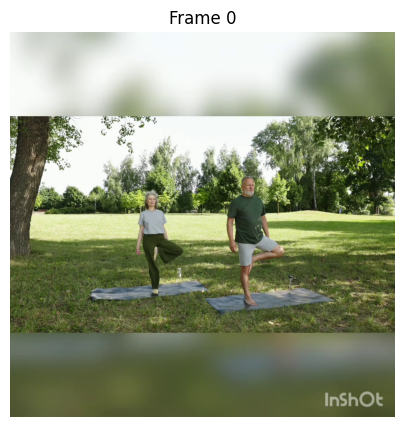

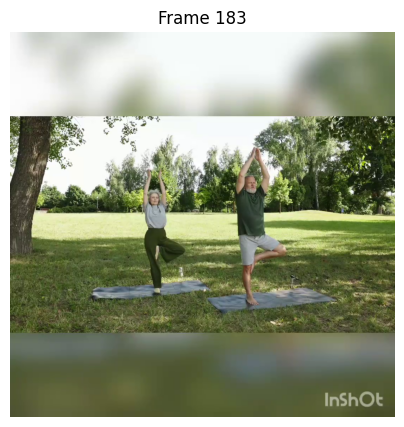

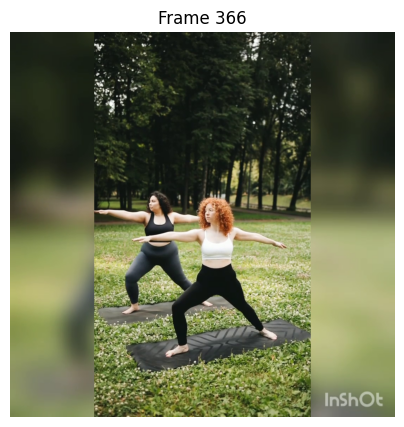

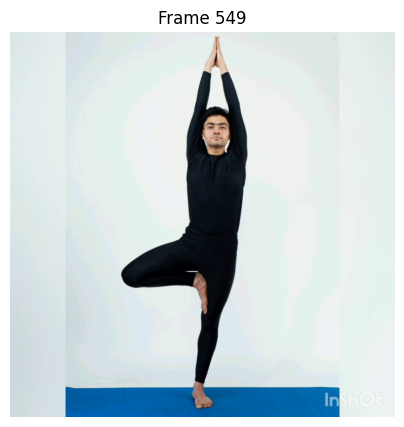

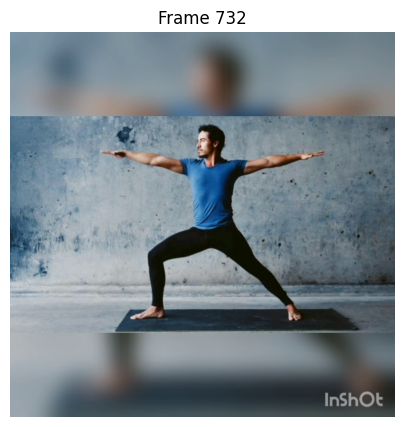

{'Frame Count': 915,
 'Resolution': '1088 x 1088 pixels',
 'Frames Per Second (FPS)': 30.00030000300003,
 'Duration': '30.50 seconds'}

In [2]:
import matplotlib.pyplot as plt
import cv2
# Function to display a frame
def display_frame(frame, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Re-open the video capture
cap = cv2.VideoCapture("yoga_3_pose.mp4")

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
duration = frame_count / fps

# Displaying basic video properties
video_properties = {
    "Frame Count": frame_count,
    "Resolution": f"{frame_width} x {frame_height} pixels",
    "Frames Per Second (FPS)": fps,
    "Duration": f"{duration:.2f} seconds",
}

# Visual Inspection: Display a few frames from different parts of the video
sample_frames = []
for i in range(0, frame_count, frame_count // 5):
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = cap.read()
    if ret:
        title = f"Frame {i}"
        display_frame(frame, title)
        sample_frames.append((i, frame))

# Close the video capture
cap.release()

video_properties



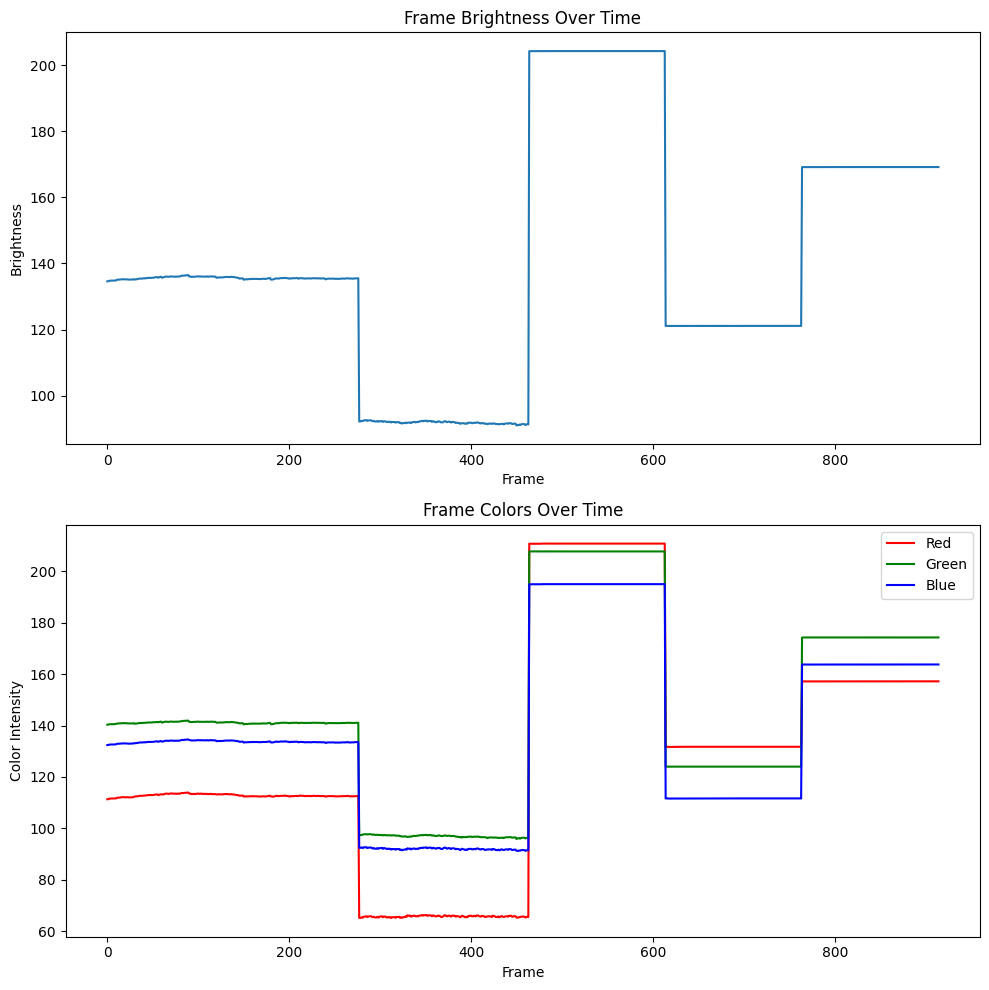

({'Mean Brightness': 141.0746184127317,
  'Brightness Standard Deviation': 36.797351445507324,
  'Min Brightness': 90.97334812256705,
  'Max Brightness': 204.26817538251512},
 {'Mean Red Intensity': 129.66872168934472,
  'Mean Green Intensity': 145.65674172037052,
  'Mean Blue Intensity': 136.56238374849474})

In [3]:
import numpy as np

# Re-open the video capture
cap = cv2.VideoCapture("yoga_3_pose.mp4")

# Frame-Level Analysis: Calculate and visualize the distribution of brightness and color
brightness = []
colors = []

for i in range(frame_count):
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = cap.read()
    if ret:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        brightness.append(np.mean(gray_frame))
        colors.append(np.mean(frame, axis=(0, 1)))

brightness = np.array(brightness)
colors = np.array(colors)

# Close the video capture
cap.release()

# Plotting the brightness and color distributions
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(brightness)
axs[0].set_title('Frame Brightness Over Time')
axs[0].set_xlabel('Frame')
axs[0].set_ylabel('Brightness')

axs[1].plot(colors[:, 0], label='Red', color='red')
axs[1].plot(colors[:, 1], label='Green', color='green')
axs[1].plot(colors[:, 2], label='Blue', color='blue')
axs[1].set_title('Frame Colors Over Time')
axs[1].set_xlabel('Frame')
axs[1].set_ylabel('Color Intensity')
axs[1].legend()

plt.tight_layout()
plt.show()

# Summary statistics for brightness and color
brightness_stats = {
    "Mean Brightness": np.mean(brightness),
    "Brightness Standard Deviation": np.std(brightness),
    "Min Brightness": np.min(brightness),
    "Max Brightness": np.max(brightness),
}

color_stats = {
    "Mean Red Intensity": np.mean(colors[:, 0]),
    "Mean Green Intensity": np.mean(colors[:, 1]),
    "Mean Blue Intensity": np.mean(colors[:, 2]),
}

brightness_stats, color_stats


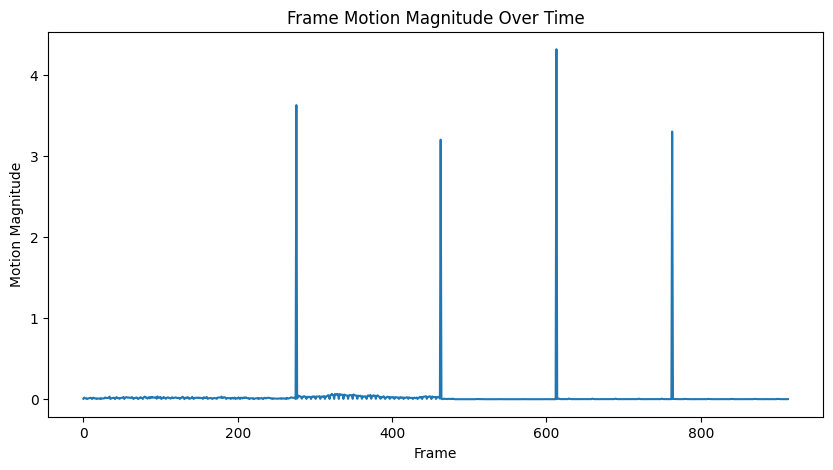

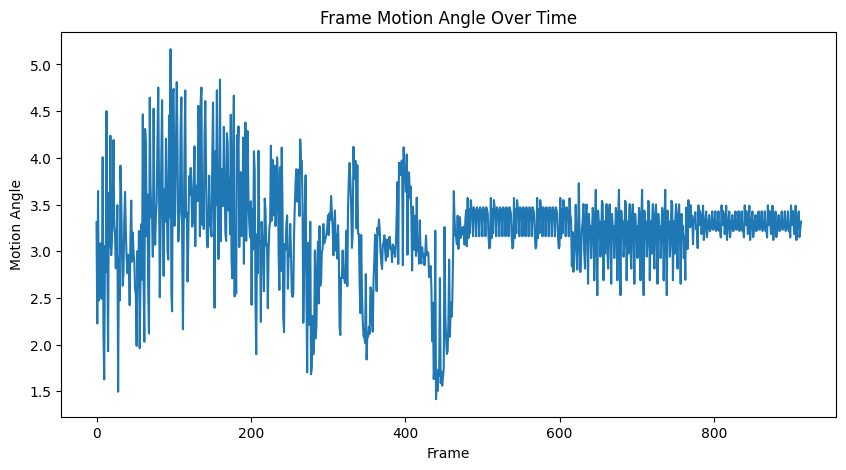

{'Mean Motion Magnitude': 0.027455816,
 'Motion Magnitude Standard Deviation': 0.23996875,
 'Min Motion Magnitude': 0.00074329315,
 'Max Motion Magnitude': 4.320236,
 'Mean Motion Angle': 3.2209723,
 'Motion Angle Standard Deviation': 0.5202581,
 'Min Motion Angle': 1.4153134,
 'Max Motion Angle': 5.1629276}

In [4]:
# Function to calculate optical flow between two frames
def calculate_optical_flow(prev_frame, current_frame):
    # Calculate dense optical flow using Farneback method
    flow = cv2.calcOpticalFlowFarneback(prev_frame, current_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Calculate the magnitude and angle of the flow vectors
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    return magnitude, angle

# Re-open the video capture
cap = cv2.VideoCapture("yoga_3_pose.mp4")

# Reduce the resolution for faster processing
scale_percent = 10  # percent of original size
width = int(frame_width * scale_percent / 100)
height = int(frame_height * scale_percent / 100)

# Motion Analysis: Calculate and visualize motion between consecutive frames
motion_magnitude = []
motion_angle = []
prev_frame = None

for i in range(frame_count):
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = cap.read()
    if ret:
        # Resize frame
        small_frame = cv2.resize(frame, (width, height), interpolation=cv2.INTER_AREA)
        # Convert to grayscale
        gray_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2GRAY)
        if prev_frame is not None:
            magnitude, angle = calculate_optical_flow(prev_frame, gray_frame)
            motion_magnitude.append(np.mean(magnitude))
            motion_angle.append(np.mean(angle))
        prev_frame = gray_frame

# Close the video capture
cap.release()

# Plotting the motion analysis results
plt.figure(figsize=(10, 5))
plt.plot(motion_magnitude)
plt.title('Frame Motion Magnitude Over Time')
plt.xlabel('Frame')
plt.ylabel('Motion Magnitude')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(motion_angle)
plt.title('Frame Motion Angle Over Time')
plt.xlabel('Frame')
plt.ylabel('Motion Angle')
plt.show()

# Summary statistics for motion
motion_stats = {
    "Mean Motion Magnitude": np.mean(motion_magnitude),
    "Motion Magnitude Standard Deviation": np.std(motion_magnitude),
    "Min Motion Magnitude": np.min(motion_magnitude),
    "Max Motion Magnitude": np.max(motion_magnitude),
    "Mean Motion Angle": np.mean(motion_angle),
    "Motion Angle Standard Deviation": np.std(motion_angle),
    "Min Motion Angle": np.min(motion_angle),
    "Max Motion Angle": np.max(motion_angle),
}

motion_stats


**Summary of Motion Analysis:**
* Mean Motion Magnitude: 0.0275 (indicates the average amount of motion between frames)
* Motion Magnitude Standard Deviation: 0.2400 (indicates the variability of motion across frames)
* Min Motion Magnitude: 0.0007 (indicates the minimum amount of motion detected between frames)
* Max Motion Magnitude: 4.3202 (indicates the maximum amount of motion detected between frames)
* Mean Motion Angle: 3.2210 (indicates the average direction of motion in radians)
* Motion Angle Standard Deviation: 0.5203 (indicates the variability of motion direction across frames)
* Min Motion Angle: 1.4153 (indicates the minimum motion direction in radians)
* Max Motion Angle: 5.1629 (indicates the maximum motion direction in radians)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


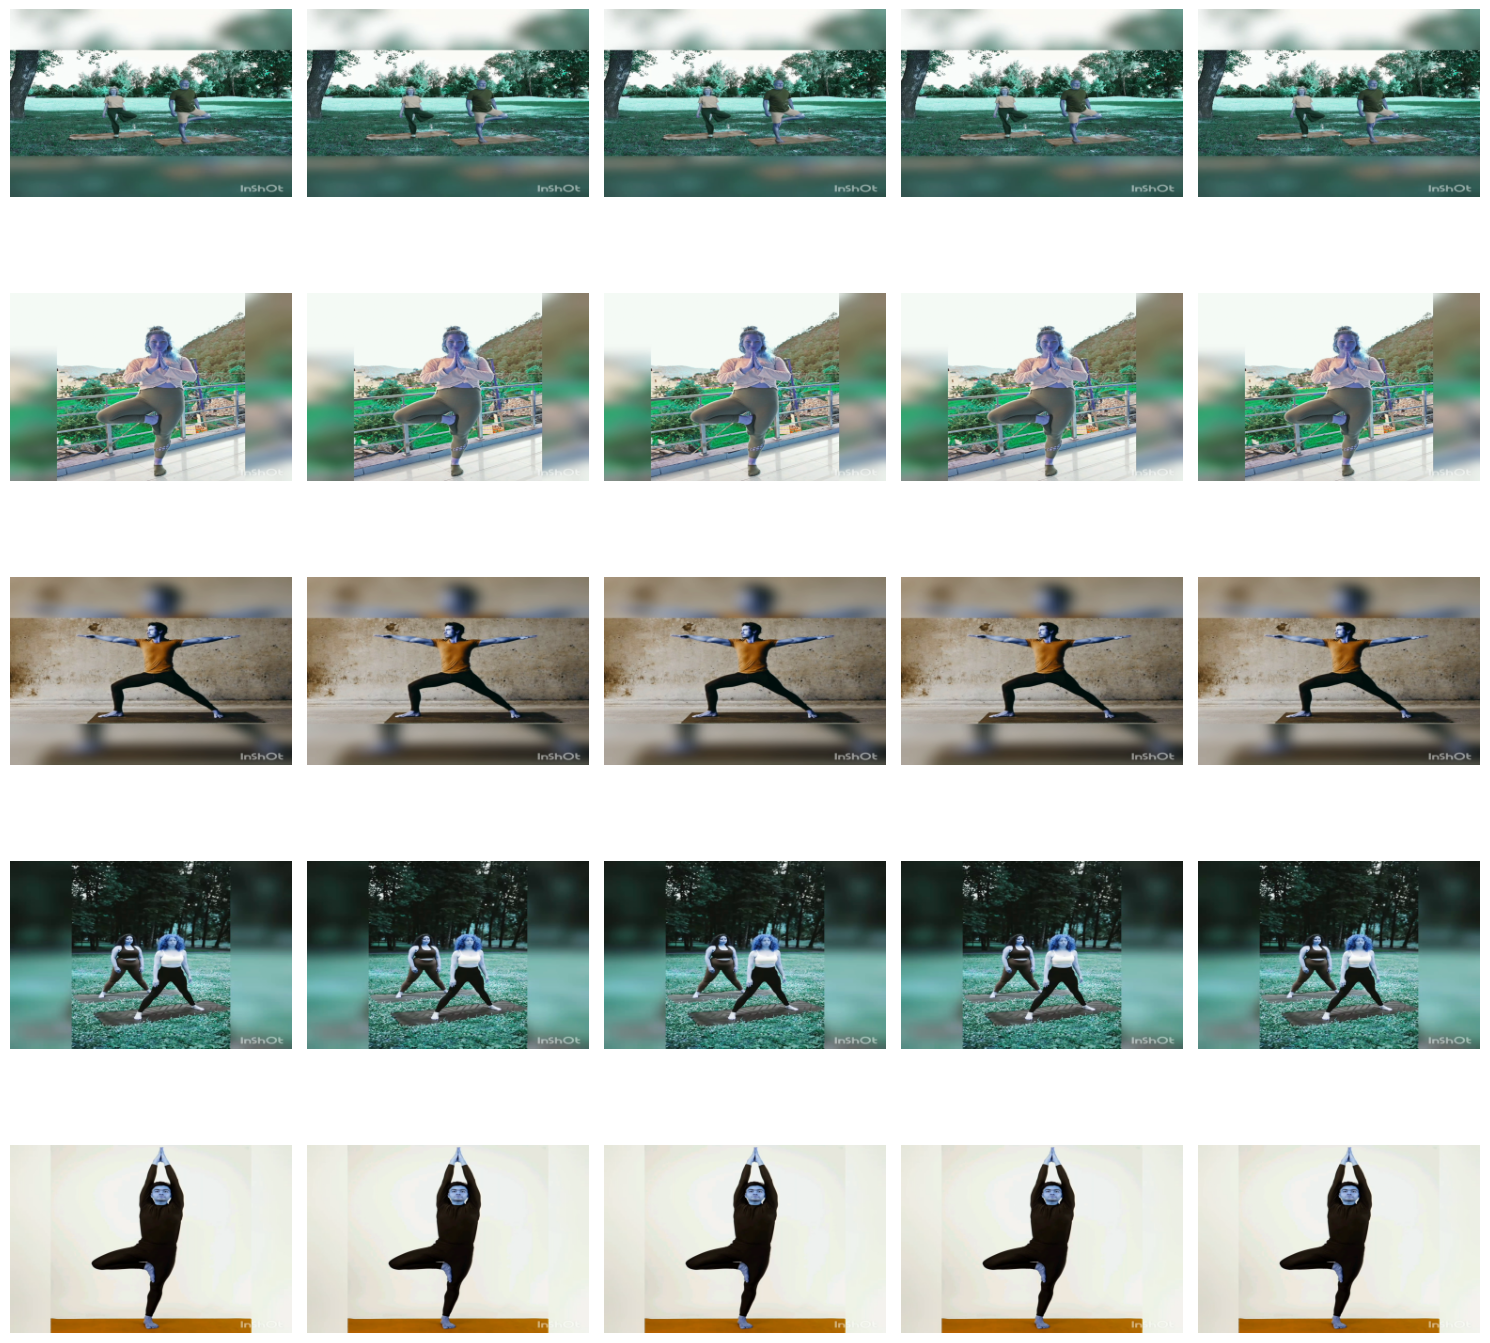

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [5]:
from sklearn.cluster import KMeans
import numpy as np
import cv2

# Re-open the video capture
cap = cv2.VideoCapture("yoga_3_pose.mp4")

# Initialize lists to store processed frames and features
processed_frames = []
edge_features = []

for i in range(frame_count):
    ret, frame = cap.read()
    if ret:
        # Resize frame
        resized_frame = cv2.resize(frame, (300, 200), interpolation=cv2.INTER_AREA)

        # Normalize pixel values to range [0, 1] and convert to 8-bit
        normalized_frame = (resized_frame / 255.0).astype(np.float32)

        # Convert to grayscale
        gray_frame = cv2.cvtColor(normalized_frame, cv2.COLOR_BGR2GRAY)

        # Apply edge detection (Canny)
        edges = cv2.Canny((gray_frame * 255).astype(np.uint8), 50, 150)

        # Flatten the edge features for clustering
        edge_features.append(edges.flatten())

        # Save the processed frame and edge features
        processed_frames.append(normalized_frame)

# Close the video capture
cap.release()

# Convert lists to numpy arrays
edge_features = np.array(edge_features)

# Apply KMeans clustering on the edge features
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(edge_features)

# Get the cluster labels for each frame
cluster_labels = kmeans.labels_

# Display a few frames from each cluster
fig, axs = plt.subplots(n_clusters, 5, figsize=(15, 3 * n_clusters))

for cluster_idx in range(n_clusters):
    cluster_frames = np.array(processed_frames)[cluster_labels == cluster_idx]
    for i in range(min(5, len(cluster_frames))):
        axs[cluster_idx, i].imshow(cluster_frames[i])
        axs[cluster_idx, i].axis('off')
    axs[cluster_idx, 0].set_ylabel(f"Cluster {cluster_idx + 1}")

plt.tight_layout()
plt.show()

# Return the cluster labels for each frame
cluster_labels[:10]  # Displaying labels for the first 10 frames as an example


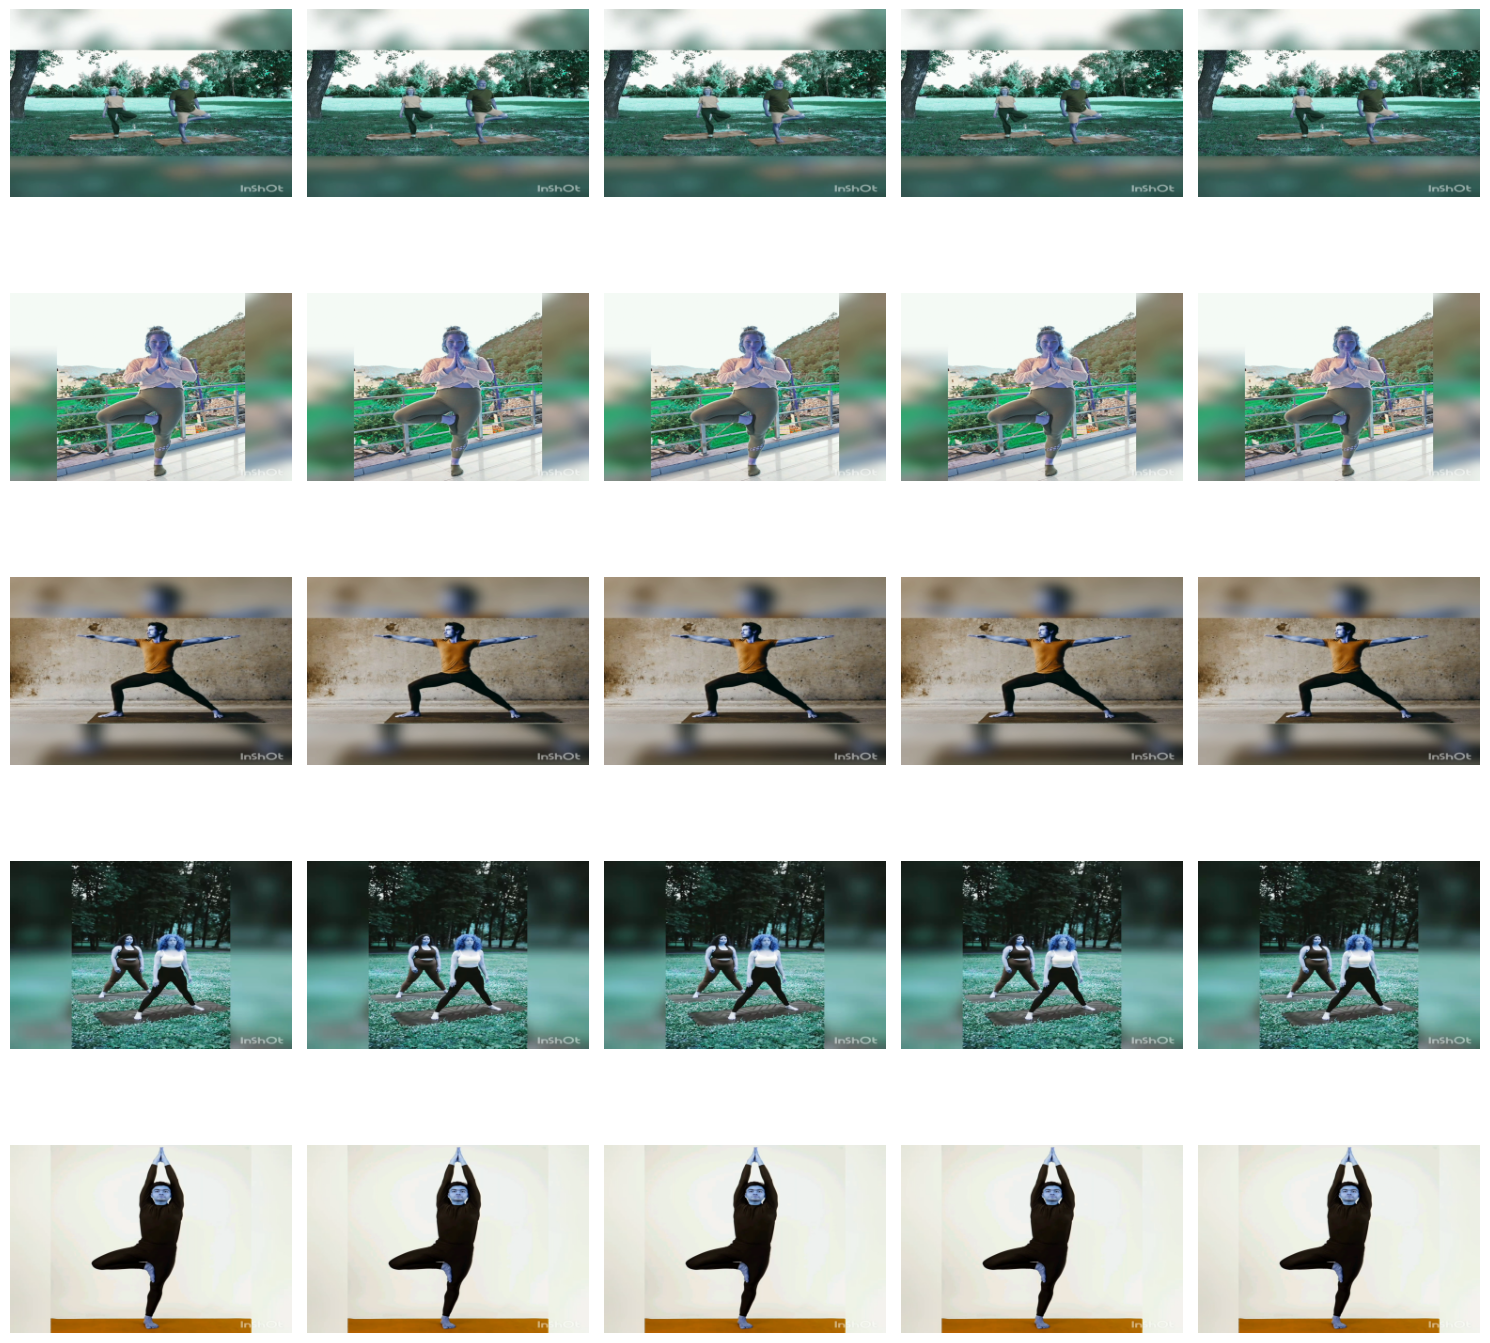

In [6]:
# Display a few frames from each cluster for visual inspection
fig, axs = plt.subplots(n_clusters, 5, figsize=(15, 3 * n_clusters))

for cluster_idx in range(n_clusters):
    cluster_frames = np.array(processed_frames)[cluster_labels == cluster_idx]
    for i in range(min(5, len(cluster_frames))):
        axs[cluster_idx, i].imshow(cluster_frames[i])
        axs[cluster_idx, i].axis('off')
    axs[cluster_idx, 0].set_ylabel(f"Cluster {cluster_idx + 1}")

plt.tight_layout()
plt.show()

In [11]:
pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.14.0 which is incompatible.


In [15]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image

# Initialize a pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def extract_features(img_path):
    # Load image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Get features from VGG16
    features = model.predict(img_array)
    return features.flatten()

# Video file path
video_path = 'yoga_3_pose.mp4'
cap = cv2.VideoCapture(video_path)

frame_number = 0
data = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute HOG features
    hog_features = hog(gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))

    # Save frame as image
    frame_filename = f"frame_{frame_number:04d}.png"
    cv2.imwrite(frame_filename, frame)

    # Extract deep learning features
    dl_features = extract_features(frame_filename)

    # Combine HOG features and deep learning features
    features = np.hstack([hog_features, dl_features])

    # Add features to data
    data.append(features)

    frame_number += 1

cap.release()

# Convert data to DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('video_data.csv', index=False)


AttributeError: ignored

In [9]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=5e32011d5b4488ed87cba1d345dc409c641af6b171a3fe72c8b393eb4e1b6395
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [10]:
import pandas as pd
data = pd.read_csv('video_data.csv')
data.head()

0    1         2    3         4    5         6    7         8    9  \
0  0.987598  0.0  0.045324  0.0  0.064097  0.0  0.135971  0.0  0.942990  0.0   
1  0.987598  0.0  0.045324  0.0  0.064097  0.0  0.135971  0.0  0.974199  0.0   
2  0.984883  0.0  0.045489  0.0  0.096497  0.0  0.136468  0.0  0.824284  0.0   
3  0.986414  0.0  0.045563  0.0  0.128871  0.0  0.091126  0.0  0.824581  0.0   
4  0.986414  0.0  0.045563  0.0  0.128871  0.0  0.091126  0.0  0.824581  0.0   

   ...      62070  62071  62072  62073  62074  62075  62076  62077  62078  \
0  ...  29.102545    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  ...  29.178202    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  ...  29.785145    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  ...  30.272091    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  ...  30.546146    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   62079  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

[5 rows x 62080 columns]

In [15]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O cluster
h2o.init()

# Load data (assuming you have converted your video data to a CSV file)
data = h2o.import_file('video_data.csv')
x = data.columns
y = 'C62070'
x.remove(y)


# Split the data into training and testing sets
train, test = data.split_frame(ratios=[.8])


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         24 mins 51 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    9 days
H2O_cluster_name:           H2O_from_python_unknownUser_e4uxtx
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.934 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models=4, seed=1)
aml.train(x=x, y=y, training_frame=train)


# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

AutoML progress: |███████████████████████████████████████████████████████████████